<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Признаки
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата
- Целевой признак
- Exited — факт ухода клиента

## Подготовка данных

In [1]:
#загрузим всё, что может пригодиться
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score 
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler 
from tqdm import tqdm


In [2]:
try:
    df= pd.read_csv('/datasets/Churn.csv')
except:
    df=pd.read_csv('/Users/aleksandrivanov/Downloads/Churn.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [6]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.007322,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.021418,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.007322,-0.021418,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


Смотрим по данным, что сходу можем сделать - удалить столбик Surname, 	RowNumber, CustomerId у нас нет цели отследить конкретного клиента, а нужна общая статистика, без имен 

In [7]:
df = df.drop(['Surname','RowNumber','CustomerId'], axis=1)

In [8]:
#сделаем все буквы в нижний регистр, иначе будет угадывать где маленькая буква была, где большая
df.columns= df.columns.str.lower()

In [9]:
df.duplicated().sum()

0

явный дубликатов тут нет, посмотрим что с пропусками


In [10]:
df.isnull().sum()

creditscore          0
geography            0
gender               0
age                  0
tenure             909
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
dtype: int64

мы не можем удалить эти пропущенные значения, так как их почти 10%, странный момент, что пропуски в разделе "сколько лет человек явнляется клиентом банка", требуется отправить запрос разработчику, почему возникла такая ситуация, у себя же заменим на 0, если бы мы оставили линейную регрессию, то лучше было бы заменить на медиану

In [11]:
df["tenure"].fillna(0, inplace=True)
df.isnull().sum()

creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [12]:
df.describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.543400,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,3.111573,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,4.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Исследование задачи

Вы познакомились с двумя техниками кодирования категориальных переменных. 

Резюмируем:
Если все признаки должны стать количественными, подходит техника OHE;
Когда все признаки категориальные, и их нужно преобразовать в числа — Ordinal Encoding.
OE не подходил для логической регрессии, но я и не собираюсь её здесь применять, она нуна для быстрого решения задачи, например, когда идёт запуск модели по данным, например, во время телефонного звонка, мы же можем здесь спокойно подождать, пока наша модел считает. Но выбор остановим на OHE, так как  у нас признаков немного

In [13]:
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  float64
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [15]:
features = df.drop(['exited'], axis=1)
target = df['exited']

Разобьем переменные в 2 этапа, в начале выделим тестовую модельв 20%, а потом оставшуюся часть разобьем ещё раз, добавим вспомогательную переменную _help

In [16]:
features_help, features_test, target_help, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345, stratify = target)

In [17]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_help, target_help, test_size=0.25, random_state=12345, stratify = target_help)

In [18]:
features_train = pd.get_dummies(features_train,drop_first= True )
features_valid = pd.get_dummies(features_valid,drop_first= True )
features_test = pd.get_dummies(features_test,drop_first= True )
# target_train = pd.get_dummies(target_train,drop_first= True )
# target_valid = pd.get_dummies(target_valid,drop_first= True )
# target_test = pd.get_dummies(target_test,drop_first= True )


In [19]:
features_test

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
7837,850,48,2.0,0.00,1,1,0,169425.30,0,1,1
9505,651,28,10.0,79562.98,1,1,1,74687.37,0,0,1
6208,714,34,10.0,0.00,2,1,1,80234.14,0,0,1
5642,782,41,4.0,0.00,1,1,0,132943.88,0,1,0
9643,521,41,2.0,0.00,2,1,1,113089.43,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1238,746,24,3.0,137492.35,2,0,1,170142.09,0,0,1
9774,679,42,1.0,0.00,2,0,0,71823.15,0,0,1
7142,612,63,2.0,131629.17,2,1,0,122109.58,0,1,0
9364,607,49,9.0,119960.29,2,1,0,103068.22,0,0,0


In [20]:
target_test

7837    1
9505    0
6208    0
5642    0
9643    0
       ..
1238    0
9774    0
7142    1
9364    0
1729    0
Name: exited, Length: 2000, dtype: int64

In [21]:
features_train

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
5536,636,45,0.0,0.00,2,1,1,159463.80,0,1,1
8530,808,33,2.0,103516.87,1,1,0,113907.80,0,0,0
1762,758,34,1.0,154139.45,1,1,1,60728.89,0,0,0
9090,809,39,5.0,0.00,1,1,0,77705.75,0,0,0
8777,603,24,1.0,165149.13,2,1,0,21858.28,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2956,792,30,8.0,0.00,2,1,0,199644.20,0,0,1
667,503,29,3.0,0.00,2,1,1,143954.99,0,0,1
7371,850,30,10.0,153972.89,2,1,0,62811.03,0,0,1
9472,775,74,0.0,161371.50,1,1,1,134869.93,1,0,0


In [22]:
target_train

5536    0
8530    0
1762    0
9090    0
8777    0
       ..
2956    0
667     0
7371    0
9472    0
8193    0
Name: exited, Length: 6000, dtype: int64

In [23]:
features_valid

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
9375,659,48,4.0,123593.22,2,1,0,82469.06,1,0,1
9536,550,42,10.0,128707.31,1,1,0,63092.65,1,0,0
6344,850,41,3.0,0.00,2,1,0,128892.36,0,0,1
4357,755,36,8.0,0.00,2,1,0,176809.87,0,0,1
9120,703,58,4.0,92930.92,1,0,1,85148.78,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7831,749,42,2.0,56726.83,2,0,1,185543.35,0,0,1
9299,824,26,0.0,146266.00,1,1,0,21903.62,0,0,1
6361,416,25,0.0,97738.97,2,1,1,160523.33,1,0,0
6343,627,55,6.0,0.00,1,0,0,91943.94,0,1,0


In [24]:
target_valid

9375    1
9536    1
6344    0
4357    0
9120    0
       ..
7831    0
9299    1
6361    0
6343    1
1674    1
Name: exited, Length: 2000, dtype: int64

Масштабирование признаков

Один из методов масштабирования — стандартизация данных.

In [25]:
pd.options.mode.chained_assignment = None
numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
print(features_train.shape, features_valid.shape)

(6000, 11) (2000, 11)


Построим 2 модели: дерево и рандомный лес, сравним их показатели

Отдельно создаем словарик, в который вписываем параметры, которые будем прогонять GridSearch’ем. буду использовать следующие параметры:

n_estimators – число деревьев в лесу. 

max_depth – глубина дерева. 

min_samples_leaf – минимальное число образцов в листах. 

min_samples_leaf – минимальное число образцов для сплита. 

In [26]:
parameters_tr = {'max_depth' : range(1,20, 5),
                'min_samples_leaf': range (1,10),
              'min_samples_split': range (2,4)}

In [27]:
%%time
tr_grid = GridSearchCV(DecisionTreeClassifier(random_state=12345), 
                       param_grid = parameters_tr, n_jobs = -1, verbose = False, scoring = 'f1', error_score=0.0)

CPU times: user 27 µs, sys: 6 µs, total: 33 µs
Wall time: 35 µs


In [28]:
%%time
tr_grid_model = tr_grid.fit(features_train, target_train)

CPU times: user 406 ms, sys: 172 ms, total: 577 ms
Wall time: 2.93 s


In [29]:
predicted_valid = tr_grid_model.predict(features_valid)
accuracy_valid = accuracy_score(predicted_valid, target_valid)
f1 = f1_score(target_valid, predicted_valid)
predict_tr = tr_grid_model.predict_proba(features_valid)
predict_tr = predict_tr[:, 1]
auc_roc = roc_auc_score(target_valid, predict_tr)



In [30]:
print(tr_grid.best_params_)
print(tr_grid.best_score_)

{'max_depth': 11, 'min_samples_leaf': 9, 'min_samples_split': 2}
0.5659748866421216


In [31]:
print('показатель Accuracy', accuracy_valid )
print('Показатель F1', f1)
print('Показатель auc_roc', auc_roc)

показатель Accuracy 0.8405
Показатель F1 0.5729585006693441
Показатель auc_roc 0.8053384663554155


In [32]:
parameters_fr = {'max_depth' : range(1,10,5),
                 'n_estimators' : range(1,10,5),
                'min_samples_leaf': range (2,8),
              'min_samples_split': range (2,8)}

In [33]:
fr_grid = GridSearchCV(RandomForestClassifier(random_state=12345), param_grid = parameters_fr,
                      n_jobs = -1, verbose = False, scoring = 'f1')

In [34]:
%%time
fr_grid_model = fr_grid.fit(features_train, target_train)
predicted_valid_fr = fr_grid_model.predict(features_valid)
accuracy_valid_fr = accuracy_score(predicted_valid_fr, target_valid)
f1_fr = f1_score(target_valid, predicted_valid_fr)
predict_fr = fr_grid_model.predict_proba(features_valid)
predict_fr = predict_fr[:, 1]
auc_roc_fr = roc_auc_score(target_valid, predict_fr)



CPU times: user 436 ms, sys: 69 ms, total: 505 ms
Wall time: 1.41 s


In [35]:
print(fr_grid_model.best_estimator_)
print(fr_grid_model.best_score_)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, n_estimators=6,
                       random_state=12345)
0.5230624707524655


In [36]:
print('показатель Accuracy', accuracy_valid_fr )
print('Показатель F1', f1_fr)
print('Показатель auc_roc', auc_roc_fr)

показатель Accuracy 0.861
Показатель F1 0.5304054054054055
Показатель auc_roc 0.8557108726600253


Выбираем случайный лес, так как он показывается лучшие результаты

при тестировании по тест  модель  не достигает требуемых результатов, но попробуем улучшить этот показатель за счет борьбы с дисбалансом

## Борьба с дисбалансом

Попробуем улучшить нашу модель за счет борьбы с дисбалансов, есть 2 варианта:
увеличение выборки и уменьшение выборки. Начнем с метода увеличение выборки


Когда обучают модели, такая техника называется upsampling (от англ. up, «вверх»; sampling, «выборка»).

Преобразование проходит в несколько этапов:

- Разделить обучающую выборку на отрицательные и положительные объекты;
- Скопировать несколько раз положительные объекты;
- С учётом полученных данных создать новую обучающую выборку;
- Перемешать данные: идущие друг за другом одинаковые вопросы не помогут обучению.

<AxesSubplot:title={'center':'Class balance'}>

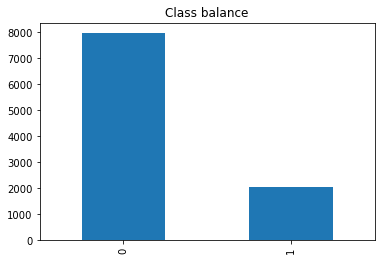

In [37]:
df['exited'].value_counts().plot(kind='bar', title = 'Class balance')

разница примерно в 4 раза, поэтому увеличиваем количество в 4 раза...

In [38]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [39]:
%%time
best_model_rf = None
best_result = 0
for est in tqdm(range(70, 100, 10)):
    for depth in range (1,20):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model_rf.fit(features_upsampled, target_upsampled) 
        predicted_valid_fr_up = model_rf.predict(features_valid)
        result = f1_score(target_valid, predicted_valid_fr_up)
        if result > best_result:
            best_model_rf = model_rf 
            best_result = result 
            best_est = est
            best_dep = depth

print("F1 наилучшей модели на валидационной выборке:", best_result)
print("количество деревье", best_est)
print ('глубина дерева', best_dep)

100%|█████████████████████████████████████████████| 3/3 [00:23<00:00,  7.97s/it]

F1 наилучшей модели на валидационной выборке: 0.6357466063348416
количество деревье 80
глубина дерева 11
CPU times: user 23.8 s, sys: 89.9 ms, total: 23.9 s
Wall time: 23.9 s


In [40]:
predicted_valid_fr_up = best_model_rf.predict(features_valid)
accuracy_valid_fr = accuracy_score(predicted_valid_fr_up, target_valid)
f1_fr = f1_score(target_valid, predicted_valid_fr_up)
predict_fr = best_model_rf.predict_proba(features_valid)
predict_fr = predict_fr[:, 1]
auc_roc_fr = roc_auc_score(target_valid, predict_fr)

In [41]:
print('показатель Accuracy', accuracy_valid_fr )
print('Показатель F1', f1_fr)
print('Показатель auc_roc', auc_roc_fr)

показатель Accuracy 0.839
Показатель F1 0.6357466063348416
Показатель auc_roc 0.8669378160903585


Уменьшение выборки

In [42]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)

In [43]:
%%time
best_model_rf = None
best_result = 0
for est in tqdm(range(1, 20, 10)):
    for depth in range (1,20):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model_rf.fit(features_downsampled, target_downsampled) 
        predicted_valid_fr_dw = model_rf.predict(features_valid)
        result = f1_score(target_valid, predicted_valid_fr_dw)
        if result > best_result:
            best_model_rf_dw = model_rf 
            best_result = result 
            best_est = est
            best_dep = depth

print("F1:", best_result)
print("количество деревье", best_est)
print ('глубина дерева', best_dep)

100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.48it/s]

F1: 0.6435754189944135
количество деревье 11
глубина дерева 6
CPU times: user 572 ms, sys: 5.99 ms, total: 578 ms
Wall time: 577 ms


In [44]:
predicted_valid_fr_dw = best_model_rf_dw.predict(features_valid)
accuracy_valid_fr = accuracy_score(predicted_valid_fr_dw, target_valid)
f1_fr = f1_score(target_valid, predicted_valid_fr_dw)
predict_fr = best_model_rf_dw.predict_proba(features_valid)
predict_fr = predict_fr[:, 1]
auc_roc_fr = roc_auc_score(target_valid, predict_fr)

In [45]:
print('показатель Accuracy', accuracy_valid_fr )
print('Показатель F1', f1_fr)
print('Показатель auc_roc', auc_roc_fr)

показатель Accuracy 0.8405
Показатель F1 0.6435754189944135
Показатель auc_roc 0.8674367742164352


посчитаем с показателем class_weight

In [46]:
%%time
best_model_rf = None
best_result = 0
for est in tqdm(range(100, 200, 10)):
    for depth in range (10,35):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight = 'balanced') 
        model_rf.fit(features_train, target_train) 
        predicted_valid_fr = model_rf.predict(features_valid)
        result = f1_score(target_valid, predicted_valid_fr)
        if result > best_result:
            best_model_rf = model_rf 
            best_result = result 
            best_est = est
            best_dep = depth

print("F1 наилучшей модели на валидационной выборке:", best_result)
print("количество деревье", best_est)
print ('глубина дерева', best_dep)

100%|███████████████████████████████████████████| 10/10 [02:52<00:00, 17.27s/it]

F1 наилучшей модели на валидационной выборке: 0.6381418092909535
количество деревье 130
глубина дерева 10
CPU times: user 2min 52s, sys: 493 ms, total: 2min 52s
Wall time: 2min 52s


In [47]:
predicted_valid_frr = best_model_rf.predict(features_valid)
accuracy_valid_fr = accuracy_score(predicted_valid_frr, target_valid)
f1_fr = f1_score(target_valid, predicted_valid_frr)
predict_fr = best_model_rf.predict_proba(features_valid)
predict_fr = predict_fr[:, 1]
auc_roc_fr = roc_auc_score(target_valid, predict_fr)

In [48]:
print('показатель Accuracy', accuracy_valid_fr )
print('Показатель F1', f1_fr)
print('Показатель auc_roc', auc_roc_fr)

показатель Accuracy 0.852
Показатель F1 0.6381418092909535
Показатель auc_roc 0.8704312941601076


требуемый порог в 0.59 преодолели все 3 варианта на валид сборках: увеличение выборки, уменьшение и балансировка весов класса

Рассмотрим ещё один вариант, с использованием grid и балансировку весов класса, а и затем добавим SMOTE отдельную главу по расчет с помощью Grid и SMOTE

In [49]:
parameters_fr = {'max_depth' : range(1,10,5),
                 'n_estimators' : range(10,30,5),
                'min_samples_leaf': range (1,4),
              'min_samples_split': range (2,4)}

In [50]:
fr_grid = GridSearchCV(RandomForestClassifier(random_state=12345, class_weight = 'balanced'), param_grid = parameters_fr,
                      n_jobs = -1, verbose = False, scoring = 'f1')

In [51]:
%%time
fr_grid_model = fr_grid.fit(features_train, target_train)
predicted_valid_grid = fr_grid_model.predict(features_valid)
accuracy_valid_fr = accuracy_score(predicted_valid_grid, target_valid)
f1_fr = f1_score(target_valid, predicted_valid_grid)
predict_fr = fr_grid_model.predict_proba(features_valid)
predict_fr = predict_fr[:, 1]
auc_roc_fr = roc_auc_score(target_valid, predict_fr)

CPU times: user 243 ms, sys: 30.2 ms, total: 274 ms
Wall time: 1.71 s


In [52]:
print(fr_grid_model.best_params_)
print(fr_grid_model.best_score_)

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
0.6036221961461571


In [53]:
print('показатель Accuracy', accuracy_valid_fr )
print('Показатель F1', f1_fr)
print('Показатель auc_roc', auc_roc_fr)

показатель Accuracy 0.815
Показатель F1 0.6177685950413223
Показатель auc_roc 0.8716281767129225


## Тестирование модели

тестируем нашего победителя

модель смогла выдать требуемые результаты на подборке: случайный лес, функция gridsearch +  балансировка веса признаков
Оставшийся вопрос - как совместить работу грида и смота


In [54]:
predicted_test_fr = fr_grid_model.predict(features_test)
accuracy_test_fr = accuracy_score(predicted_test_fr, target_test)
f1_fr_test = f1_score(target_test, predicted_test_fr)
predict_fr_test = fr_grid_model.predict(features_test)
auc_roc_fr_test = roc_auc_score(target_test, predict_fr_test)

In [55]:
print('показатель Accuracy', accuracy_test_fr )
print('Показатель F1', f1_fr_test)
print('Показатель auc_roc', auc_roc_fr_test)

показатель Accuracy 0.827
Показатель F1 0.6319148936170211
Показатель auc_roc 0.7907907907907908


альтернативный способ решения с использованием grid + smote

In [56]:
try:
    df= pd.read_csv('/datasets/Churn.csv')
except:
    df=pd.read_csv('/Users/aleksandrivanov/Downloads/Churn.csv')

In [57]:
pd.set_option('display.max_columns', None)
df = df.drop(['Surname','RowNumber','CustomerId'], axis=1)
df.columns= df.columns.str.lower()
df["tenure"].fillna(0, inplace=True)
features = df.drop(['exited'], axis=1)
target = df['exited']

In [58]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345, stratify = target)

In [59]:
features_train = pd.get_dummies(features_train,drop_first= True )
features_test = pd.get_dummies(features_test,drop_first= True )

In [60]:
numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [61]:
parameters_fr = {'max_depth' : range(6,10),
                'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,8),
                'n_estimators': range(30, 40)}

In [62]:
fr_grid = GridSearchCV(RandomForestClassifier(random_state=12345, class_weight = 'balanced'), 
                       param_grid = parameters_fr, n_jobs = -1, verbose = False, scoring = 'f1')

In [63]:
%%time
fr_grid_model_ = fr_grid.fit(features_train, target_train)
predicted_test_grid = fr_grid_model_.predict(features_test)
accuracy_test_fr_ = accuracy_score(predicted_test_grid, target_test)
f1_fr_ = f1_score(target_test, predicted_test_grid)
predict_fr_ = fr_grid_model.predict_proba(features_test)
predict_fr_ = predict_fr_[:, 1]
auc_roc_fr_ = roc_auc_score(target_test, predict_fr)

CPU times: user 14.5 s, sys: 2.54 s, total: 17 s
Wall time: 2min 46s


In [64]:
print('показатель Accuracy', accuracy_test_fr_)
print('Показатель F1', f1_fr_)
print('Показатель auc_roc', auc_roc_fr_)

показатель Accuracy 0.8355
Показатель F1 0.6372657111356119
Показатель auc_roc 0.4837641956286024


In [65]:
print(fr_grid_model_.best_params_)
print(fr_grid_model_.best_score_)

{'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 38}
0.6172343761558461


In [66]:
! pip install imblearn

In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
smote = SMOTE(random_state = 12345)
features_train_sm, target_train_sm = smote.fit_resample(features_train, target_train)

In [69]:
%%time
fr_grid_model_sm = fr_grid.fit(features_train_sm, target_train_sm)
predicted_test_grid_sm = fr_grid_model_sm.predict(features_test)
accuracy_test_fr = accuracy_score(predicted_test_grid_sm, target_test)
f1_fr = f1_score(target_test, predicted_test_grid_sm)
predict_fr_sm = fr_grid_model_sm.predict_proba(features_test)
predict_fr_sm = predict_fr_sm[:, 1]
auc_roc_fr_sm = roc_auc_score(target_test, predict_fr_sm)

CPU times: user 15.4 s, sys: 3.28 s, total: 18.7 s
Wall time: 4min 40s


In [70]:
print('показатель Accuracy', accuracy_test_fr )
print('Показатель F1', f1_fr)
print('Показатель auc_roc', auc_roc_fr_sm)

показатель Accuracy 0.823
Показатель F1 0.6152173913043478
Показатель auc_roc 0.8556183301946014


In [71]:
print(fr_grid_model_sm.best_params_)
print(fr_grid_model_sm.best_score_)

{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 31}
0.82979671182629


Основные выводы:
- требуется уточнить у коллег с разработки, почему получилось такое количество пропусков в столбце по количеству лет взаимодействия с банком
- остальные данные не имеют явное количество выборосов
- удалили 3 столбца, которые не несут эффективной информации для прогнозирования оттока

В работе были рассмотрены несколько методов, как увеличить требуемые показания. Как от менее времене затратных ввиде Стратифай и Балансировка весов, так и более ресурсозатратные ввиде увеличения и уменьшения выборки.

проведено исследование работы двух вариантов расчетов на освное модели случайный лес и дерево решений, наиболее эффективным оказался случайный лес, но он требует больше времени на расчет модели. так как у нас нет в этой ситации необхолимости быстро провести расчет, поэтому выбираем случайный лес, вариант логической регрессии откидываем сразу

Несколько моделей смогли преодолеть требуемый порог в Ф1 0.59, наиболее затратный по техническим параметрам - Grid+ SMOTE, но он наимее затратен по длинне кода

- Для предобратобки категориальных признаков был использован метод ОНЕ
- было произведено масштабирование признаков
- рассмотрены эффекты от разных варинатов борьбы с дисбалансом в данных: увеличение выборки, уменьшение выборки, балансировка весов классов, готовая функция SMOTE 